In [6]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [7]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [8]:
X_train.shape

(60000, 28, 28)

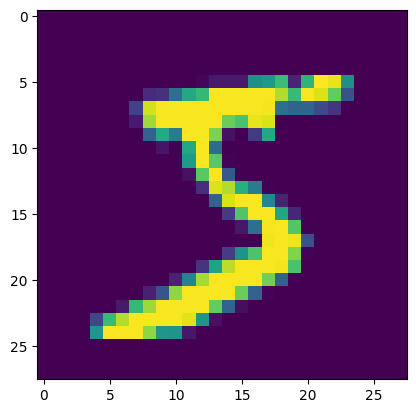

In [10]:
plt.imshow(X_train[0])

In [11]:
X_train_flatten = X_train.reshape(-1, 28*28)
X_test_flatten = X_test.reshape(-1, 28*28)
X_train_flatten.shape

(60000, 784)

In [23]:
model = keras.Sequential([
    keras.layers.Dense(32, input_shape=(28*28,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train_flatten, y_train, epochs=5)

Epoch 1/5


/home/abir/miniconda3/envs/simple_env/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 476us/step - accuracy: 0.4036 - loss: 6.1234
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 448us/step - accuracy: 0.7099 - loss: 0.9569
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 434us/step - accuracy: 0.8430 - loss: 0.5761
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 415us/step - accuracy: 0.8857 - loss: 0.4301
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 438us/step - accuracy: 0.9046 - loss: 0.3625


In [24]:
X_train_scaled = X_train_flatten / 255
X_test_scaled = X_test_flatten / 255
model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
 123/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - accuracy: 0.0965 - loss: 3.1125  

2024-07-16 13:20:04.128028: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 461us/step - accuracy: 0.5165 - loss: 1.6278
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 425us/step - accuracy: 0.9137 - loss: 0.3066
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 454us/step - accuracy: 0.9316 - loss: 0.2324
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 452us/step - accuracy: 0.9435 - loss: 0.1968
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 446us/step - accuracy: 0.9510 - loss: 0.1639


In [16]:
model.evaluate(X_test_scaled, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 296us/step - accuracy: 0.9530 - loss: 0.1580


[0.1425611674785614, 0.9592999815940857]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step


<Axes: >

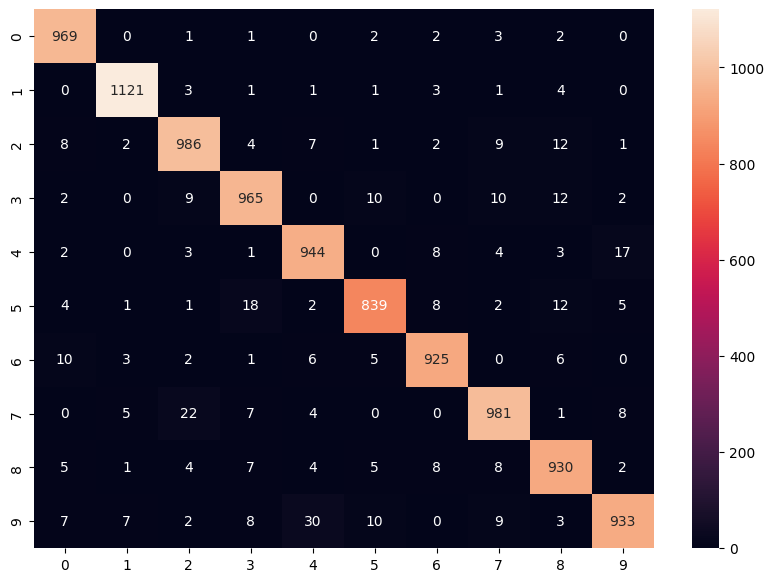

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test_scaled)
y_pred_labels = [np.argmax(i) for i in y_pred]
cm = confusion_matrix(y_test, y_pred_labels)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')